# Assignment 3

# This assignment is due on April 19, 23:59pm.  You should submit your solution on Canvas as a pdf file.

## Question 1 (5 marks)

Consider a classification tree with $D$ terminal nodes denoted $R_d$, $d=1,\dots, D$.  We have training data $(y_i,x_i)$, $i=1,\dots, n$, where $y_i\in \{1,\dots, K\}$ are class labels, and $x_i\in\mathbb{R}^p$ are feature vectors.  We suppose that there are $n_d$ training feature vectors in $R_d$, and that $n_{dj}$ of these have class label $j$.  

Recall that a multinomial distribution describes the distribution of counts of events of $K$ different types in $m$ independent trials with the $j$th event type having probability $p_j$, $j=1,\dots, K$, $\sum_{j=1}^K p_j=1$.  The multinomial probability function gives the probability of $x_j$ events of type $j$, $j=1,\dots, K$, in $m$ independent trials as $$\frac{m!}{\prod_{j=1}^K x_j!}\prod_{j=1}^K p_j^{x_j},$$ where $x_j$ are integers, $x_j\geq 0$, $\sum_{j=1}^K x_j=m$.

(a) Suppose that in the regression tree the probability of an observation having class $j$ in terminal node $R_d$ is denoted $p_{dj}$.  Write $p_d=(p_{d1},\dots, p_{dK})^\top$ and $p=(p_1^\top,\dots, p_D^\top)^\top$.  So $p_d$ is the set of class probabilities for region $R_d$ as a column vector, and $p$ is the set of all the probabilities as a column vector.  Show that the log-likelihood function $\ell(p)$ for the observed data is $$\ell(p)=\sum_{d=1}^D \sum_{j=1}^K n_{dj}\log p_{dj},$$
apart from an additive constant that does not depend on $p$.  

(b) It is easily shown that the maximum likelihood estimate of $p_{dj}$ is $\hat{p}_{dj}=n_{dj}/n_d$ (you are not required to prove this).  Write $\hat{p}_d=(\hat{p}_{d1},\dots,\hat{p}_{dK})^\top$, and $\hat{p}=(\hat{p}_1^\top,\dots, \hat{p}_D^\top)^\top$.  Show that the negative log-likelihood at $\hat{p}$ is $$-\sum_{d=1}^D n_d \sum_{j=1}^K \hat{p}_{dj}\log \hat{p}_{dj},$$ (apart from an additive constant independent of $p$) which is the weighted sum of entropy node impurity at the terminal nodes, weighting by the number of observations at the nodes.  This is an analogous quantity to the residual sum of squares for regression trees, and one of the criteria we used when growing and pruning classification trees.

## Question 2 (5 marks)

In our discussion of the support vector machine, one of the kernels we used in examples was the radial kernel:  $$K(x,z)=\exp(-\gamma \|x-z\|^2).$$ We mentioned in class that any valid kernel could be written in the form $$K(x,z) = \sum_{i=1}^\infty \phi_i(x)\phi_i(z),$$ where we could regard $\phi(x)=(\phi_1(x),\phi_2(x),\dots )$ as an extended feature vector, with the kernel $K(x,z)$ computing an inner product for the extended features.  For simple notation suppose that the feature vector is one-dimesional, and writing $$\exp(-\gamma(x-z)^2)=\exp(-\gamma x^2)\exp(-\gamma z^2)\exp(2\gamma xz),$$ and expanding the last term using the power series representation $\exp(w)=\sum_{i=0}^\infty \frac{w^i}{i!}$, find an explicit feature map $\phi(x)$ for which $K(x,z)=\sum_{i=1}^\infty \phi_i(x)\phi_i(z)$ for the radial kernel.    

## Question 3 (5 marks)

The following question describes one way to perform a principal components analysis (PCA) when the number of observations $n$ is much less than $p$.  As you know, in this case there are only $\min\{n-1,p\}=n-1$ principal components.  Suppose that $X$ is the data matrix (of size $n\times p$) and that the columns of $X$ are centred to have mean zero.  Then the sample covariance matrix is $n^{-1}X^\top X$ (using a denominator of $n$).  

(a) By considering the eigenvector equation for $S$, $$S\phi_i=n^{-1}X^\top X\phi_i=\lambda_i \phi_i,$$ and multiplying both sides by $X$, deduce that the non-zero eigenvalues of $n^{-1}XX^\top$ are the same as those of $S=n^{-1}X^\top X$.  The reason this is important is that if $n$ is much smaller than $p$, it is easier to work with the $n\times n$ matrix $n^{-1}XX^\top$ rather than the $p\times p$ matrix $S$. 

(b) Let $\phi_i'$ be an eigenvector of $n^{-1}XX^\top$, i.e. $$n^{-1}XX^\top \phi_i'=\lambda_i\phi_i'.$$  Multiply both sides of this equation by $X^\top$ and deduce that $X^\top \phi_i'$ satisfies the eigenvector equation for $S$.  

(c) Show that to obtain an eigenvector by rescaling the vector $X^\top \phi_i'$ obtained in part (b) so that it has length one, we should use $(n\lambda_i)^{-1/2}X^\top \phi_i'$.  

## Question 4 (5 marks)

This is question 7 in Section 12.6 of your textbook, page 556.  

From the textbook website there is a csv file ``Ch12Ex13.csv`` that I have put on the Canvas files in the ``Assignments``folder.  The dataset consists of measurements of gene expression for $1,000$ genes on $40$ tissue samples.  The first $20$ samples are from healthy patients, while the second $20$ are from a diseased group.  

(a) Load in the data using ``pd.read_csv()``.  You will need to select ``header=None``.  

(b) Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram.  Do the genes separate the samples into two groups?  Do your results depend on the type of linkage used?

(c) Your collaborator wants to know which genes differ the most across the two groups.  Suggest a way to answer this question, and apply it here.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch

In [2]:
# Load the data from the file as df
df = pd.read_csv('Ch12Ex13.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


In [38]:
df.shape

(1000, 40)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [3]:
# Genes are features and samples from tissues are observations!
# This means that we need to transpose the data frame
df_t = df.T

In [ ]:
# features are gene exp val so they r alrdy on a similar scale 

In [4]:
df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


In [13]:
df_dissimilarity = 1 - df.corr()
df_dissimilarity

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,1.028013,0.984697,1.030405,1.039928,1.033158,0.994942,1.050637,1.033714,1.058682,...,1.019518,0.995999,1.024002,1.032853,1.064466,1.001224,1.041685,1.040801,1.063718,1.040906
1,1.028013,0.000000,1.037593,0.987210,0.971670,1.047242,0.985945,0.999612,1.004570,0.992726,...,0.976116,1.008993,0.987318,1.008374,1.004504,1.013603,0.976970,1.005824,1.007771,0.997654
2,0.984697,1.037593,0.000000,0.945623,1.032027,1.008847,1.013728,1.014907,0.981886,1.014695,...,1.006819,1.037341,1.030655,0.981622,1.028184,1.009512,1.023750,0.972365,1.032744,0.975617
3,1.030405,0.987210,0.945623,0.000000,1.089872,1.012385,1.003622,1.032545,0.974249,0.969806,...,0.957504,0.965980,0.981463,0.975033,0.993135,0.980204,1.005030,0.960317,0.989347,0.942852
4,1.039928,0.971670,1.032027,1.089872,0.000000,1.023338,0.955816,1.024820,1.044871,0.961143,...,1.021311,1.023989,0.998793,1.020737,0.955043,0.939527,0.972481,1.037396,1.019258,0.988224
5,1.033158,1.047242,1.008847,1.012385,1.023338,0.000000,0.994802,0.976137,1.025799,0.942047,...,0.953522,0.996845,1.040520,1.028019,0.977281,0.966675,1.008727,0.986907,1.019934,1.057686
6,0.994942,0.985945,1.013728,1.003622,0.955816,0.994802,0.000000,1.002212,0.942781,0.961676,...,0.998041,1.036964,0.956493,1.010537,0.998178,1.038771,1.011747,1.014813,0.983455,1.023481
7,1.050637,0.999612,1.014907,1.032545,1.024820,0.976137,1.002212,0.000000,0.988439,0.971466,...,0.985155,1.000878,1.055633,0.984003,1.047803,0.965414,0.963843,0.994843,1.044224,0.980635
8,1.033714,1.004570,0.981886,0.974249,1.044871,1.025799,0.942781,0.988439,0.000000,0.991322,...,0.932121,0.960230,1.016964,0.967410,1.013505,1.019678,1.022298,1.011817,0.999433,1.016800
9,1.058682,0.992726,1.014695,0.969806,0.961143,0.942047,0.961676,0.971466,0.991322,0.000000,...,0.957081,0.958477,1.004555,1.001044,0.959668,0.967715,0.965817,1.010841,0.998984,0.982986


/tmp/ipykernel_1670/2334335830.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_complete = sch.linkage(df_dissimilarity, method='complete')


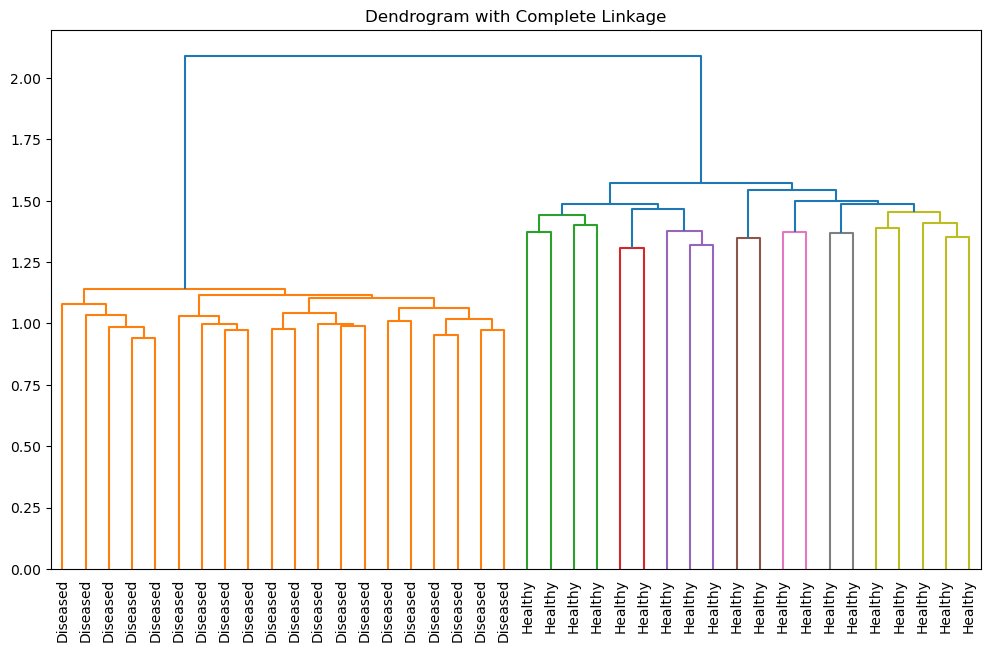

In [15]:
from scipy.spatial.distance import squareform
# Hierarchical clustering using complete linkage
condensed_matrix = squareform(df_dissimilarity, checks=False)
linked_complete = sch.linkage(df_dissimilarity, method='complete')

# Plotting the dendrogram for complete linkage
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_complete, labels=["Healthy" if i < 20 else "Diseased" for i in range(40)],
               leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram with Complete Linkage")
plt.show()

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

# Assuming df_scaled is a numpy array and you've computed the correlation matrix and its dissimilarity
correlation_matrix = np.corrcoef(df_scaled, rowvar=False)
df_scaled_dissimilar = 1 - correlation_matrix
df_scaled_dissimilar = (df_scaled_dissimilar + df_scaled_dissimilar.T) / 2
np.fill_diagonal(df_scaled_dissimilar, 0)
df_scaled_dissimilar.shape

(40, 40)

In [36]:
df_scaled_dissimilar

array([[0.        , 1.02801306, 0.98469742, ..., 1.04080076, 1.0637182 ,
        1.04090627],
       [1.02801306, 0.        , 1.03759278, ..., 1.00582427, 1.00777069,
        0.99765448],
       [0.98469742, 1.03759278, 0.        , ..., 0.97236451, 1.03274407,
        0.97561676],
       ...,
       [1.04080076, 1.00582427, 0.97236451, ..., 0.        , 0.68754848,
        0.71859267],
       [1.0637182 , 1.00777069, 1.03274407, ..., 0.68754848, 0.        ,
        0.69205911],
       [1.04090627, 0.99765448, 0.97561676, ..., 0.71859267, 0.69205911,
        0.        ]])

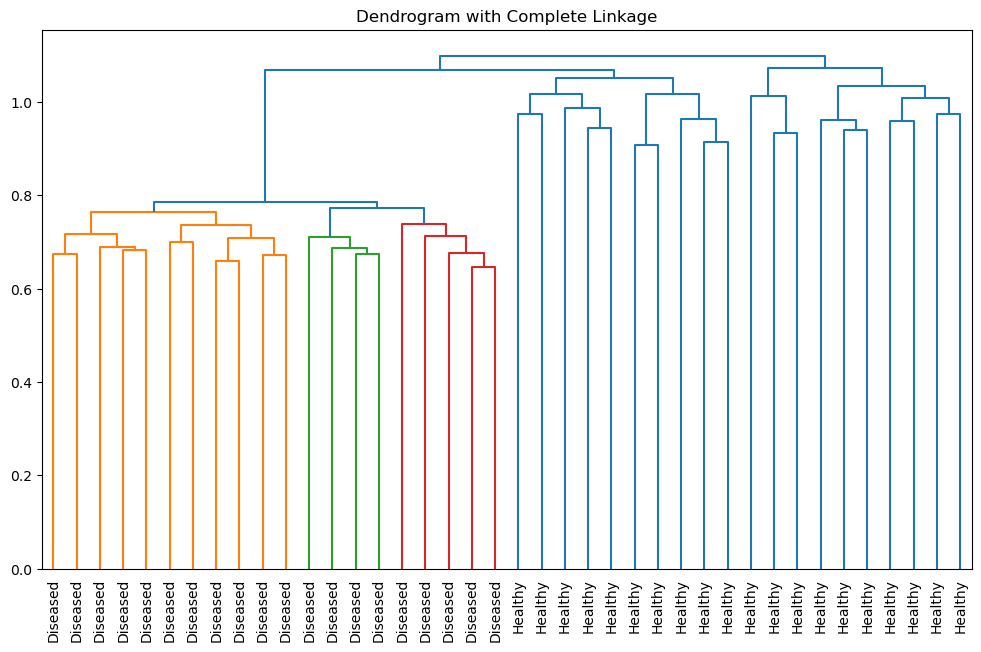

In [37]:
# Convert the full distance matrix to a condensed distance matrix
condensed_matrix = squareform(df_scaled_dissimilar)

# Hierarchical clustering using complete linkage
linked_complete = sch.linkage(condensed_matrix, method='complete')

# Plotting the dendrogram for complete linkage
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_complete, labels=["Healthy" if i < 20 else "Diseased" for i in range(40)],
               leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram with Complete Linkage")
plt.show()

In [5]:
# Calculate the condensed correlation distance matrix
condensed_corr_distance = pdist(df_t, metric='correlation')

In [ ]:
# Correlation of rows with scaled columns?  

In [6]:
condensed_corr_distance

array([1.02801306, 0.98469742, 1.03040465, 1.03992822, 1.0331583 ,
       0.99494166, 1.05063736, 1.03371388, 1.0586822 , 1.00262043,
       1.00229122, 1.03353853, 1.00351683, 1.01178545, 1.02335043,
       1.03568974, 1.05865058, 1.04000498, 0.95540333, 1.034762  ,
       1.03184236, 1.07812605, 1.01521899, 1.01326253, 1.02215472,
       1.01444264, 1.02219469, 1.03961072, 1.02821285, 1.01951758,
       0.99599884, 1.02400175, 1.0328526 , 1.06446557, 1.00122397,
       1.04168519, 1.04080076, 1.0637182 , 1.04090627, 1.03759278,
       0.98721025, 0.97166955, 1.04724154, 0.98594516, 0.99961218,
       1.00456992, 0.99272588, 1.00957509, 1.01122583, 1.05136079,
       1.00865416, 0.96296074, 1.00911156, 1.00431441, 1.03314203,
       0.97313213, 1.01378993, 1.00481809, 0.98472686, 0.99051985,
       1.01688452, 0.96823635, 0.96966916, 1.0082292 , 0.95968259,
       1.0059454 , 0.97500493, 0.97611552, 1.00899298, 0.98731765,
       1.0083741 , 1.0045036 , 1.01360265, 0.9769701 , 1.00582

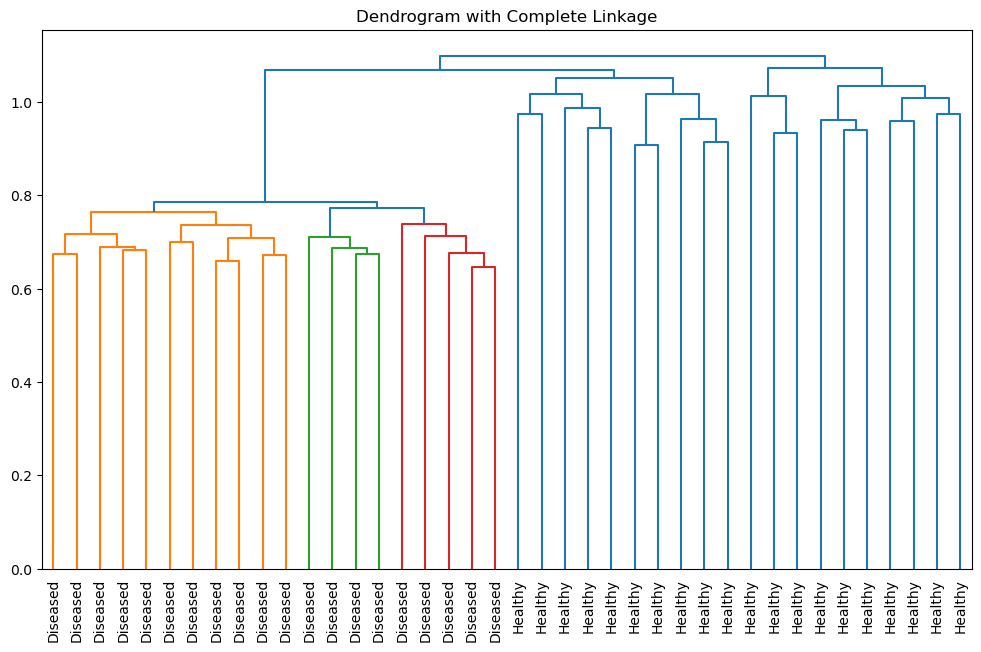

In [6]:
# Hierarchical clustering using complete linkage
linked_complete = sch.linkage(condensed_corr_distance, method='complete')

# Plotting the dendrogram for complete linkage
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_complete, labels=["Healthy" if i < 20 else "Diseased" for i in range(40)],
               leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram with Complete Linkage")
plt.show()


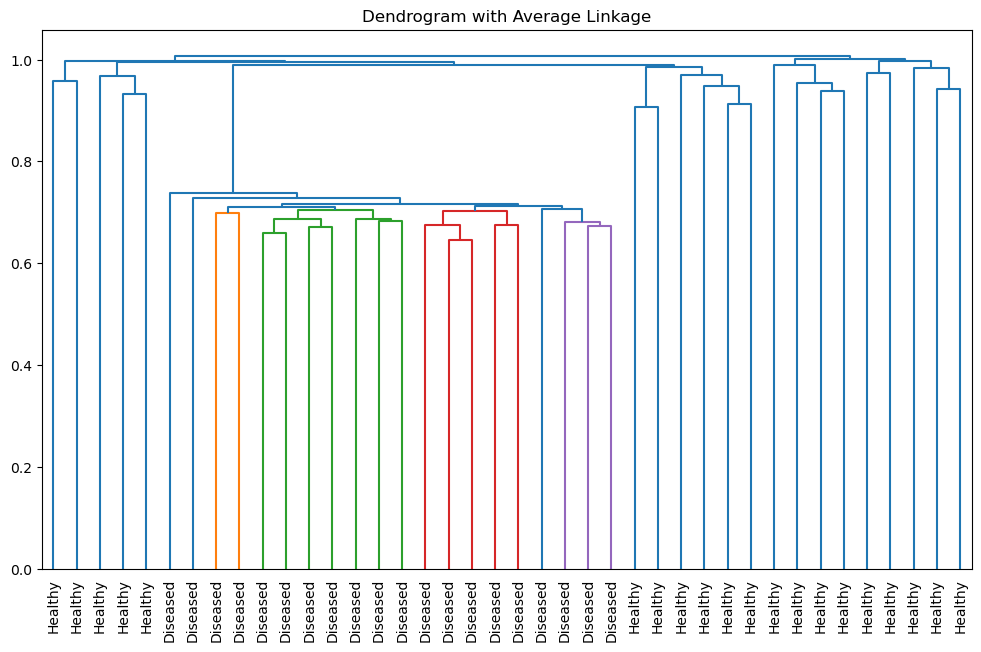

In [7]:
# Hierarchical clustering using average linkage
linked_complete = sch.linkage(condensed_corr_distance, method='average')

# Plotting the dendrogram for average linkage
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_complete, labels=["Healthy" if i < 20 else "Diseased" for i in range(40)],
               leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram with Average Linkage")
plt.show()

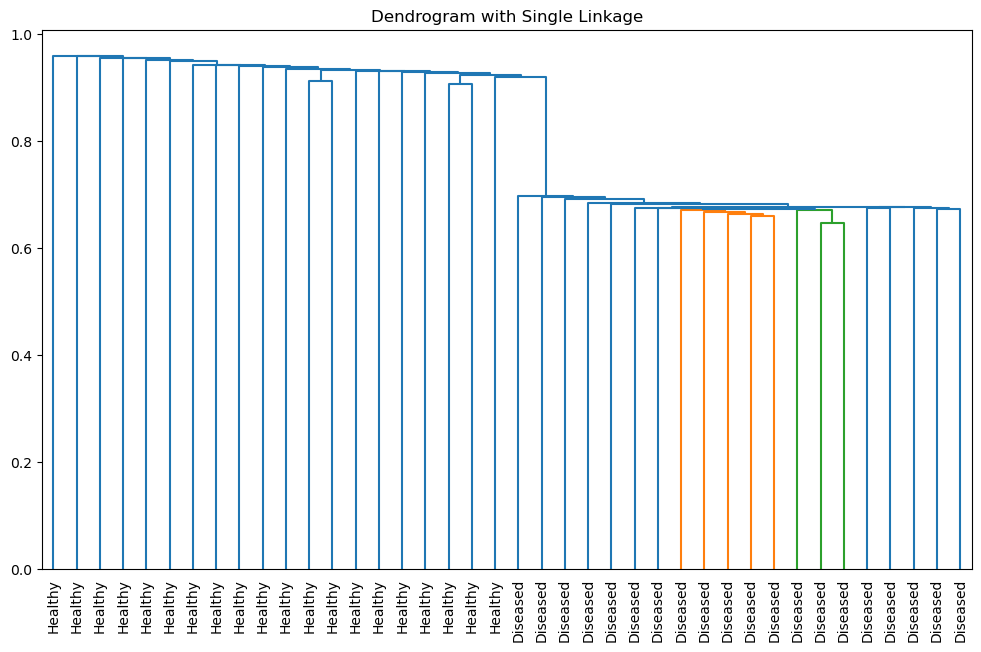

In [8]:
# Hierarchical clustering using single linkage
linked_complete = sch.linkage(condensed_corr_distance, method='single')

# Plotting the dendrogram for single linkage
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_complete, labels=["Healthy" if i < 20 else "Diseased" for i in range(40)],
               leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram with Single Linkage")
plt.show()

In [9]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Split the data into healthy and diseased groups
healthy_data = df_t.iloc[:20, :]  # First 20 samples
diseased_data = df_t.iloc[20:, :]  # Last 20 samples

# Perform t-tests
p_values = [ttest_ind(healthy_data.iloc[:, i], diseased_data.iloc[:, i]).pvalue for i in range(df_t.shape[1])]

# Correct for multiple testing using FDR
rejects, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Find significant genes
significant_genes = df_t.columns[rejects]

print("Number of significantly different genes:", len(significant_genes))
print("Indices of significant genes:", significant_genes)


Number of significantly different genes: 117
Indices of significant genes: Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
       ...
       593, 594, 595, 596, 597, 598, 599, 614, 852, 966],
      dtype='int64', length=117)


In [10]:
import numpy as np
from scipy.stats import pearsonr

# Create group labels (0 for healthy, 1 for diseased)
labels = np.concatenate([np.zeros(20), np.ones(20)])

# Compute correlations between each gene's expression and the group labels
correlations = []
p_values = []
for i in range(df_t.shape[1]):
    corr, p_val = pearsonr(df_t.iloc[:, i], labels)
    correlations.append(corr)
    p_values.append(p_val)

# Apply multiple testing correction
_, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Extract significantly correlated genes
significant_genes = df_t.columns[np.where(pvals_corrected < 0.05)]

print("Significantly correlated genes:", significant_genes)


Significantly correlated genes: Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
       ...
       593, 594, 595, 596, 597, 598, 599, 614, 852, 966],
      dtype='int64', length=117)


In [42]:
len(significant_genes)

117

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, pearsonr

# Create group labels
labels = np.array([0]*20 + [1]*20)

# Initialize lists to store results
t_stats = []
p_values_ttest = []
correlations = []
p_values_corr = []

# Perform analysis for each gene
for i in range(df_t.shape[1]):
    # T-test between groups
    t_stat, p_value_t = ttest_ind(df_t.iloc[:20, i], df_t.iloc[20:, i])
    t_stats.append(t_stat)
    p_values_ttest.append(p_value_t)
    
    # Correlation analysis
    corr, p_value_c = pearsonr(df_t.iloc[:, i], labels)
    correlations.append(corr)
    p_values_corr.append(p_value_c)

# Identify the gene with the most significant t-test result
min_p_value_index_ttest = np.argmin(p_values_ttest)
most_significant_gene_ttest = df_t.columns[min_p_value_index_ttest]

# Identify the gene with the strongest correlation (highest absolute correlation coefficient)
highest_corr_index = np.argmax(np.abs(correlations))
most_significant_gene_corr = df_t.columns[highest_corr_index]

print("Most significant gene by t-test:", most_significant_gene_ttest, "with p-value:", p_values_ttest[min_p_value_index_ttest])
print("Gene with strongest correlation:", most_significant_gene_corr, "with correlation coefficient:", correlations[highest_corr_index])


Most significant gene by t-test: 501 with p-value: 1.4250640158438702e-12
Gene with strongest correlation: 501 with correlation coefficient: 0.858431574872519
